In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('temperature_data_processed.csv')
df['date']= pd.to_datetime(df["date"], format="%Y%m%d")
df = df[df['temp'] != -999]
df

,stationid,temp,date,time
0,3,-5.6,1891-01-01,7
1,3,-0.7,1891-01-01,14
2,3,-4.0,1891-01-01,21
3,3,-5.2,1891-01-02,7
4,3,-1.0,1891-01-02,14
...,...,...,...,...
6972476,15526,7.4,1935-12-30,14
6972477,15526,7.0,1935-12-30,20
6972478,15526,7.0,1935-12-31,8
6972479,15526,8.2,1935-12-31,14


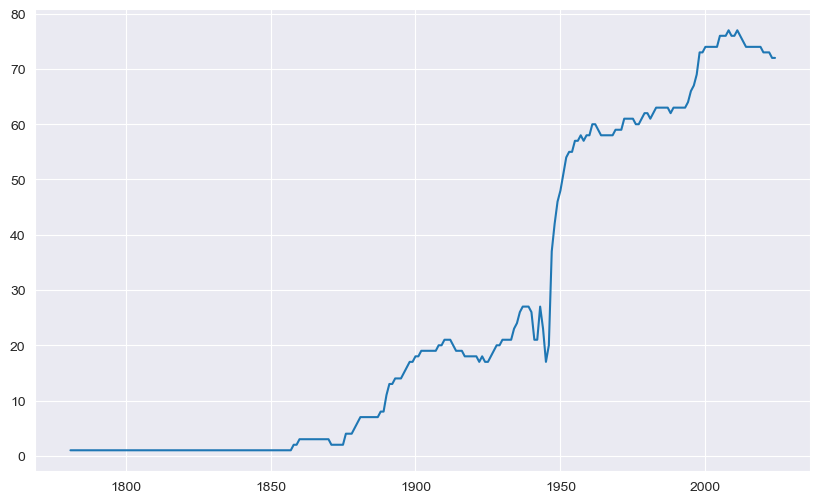

In [26]:
#t YYYYMMDD
df['year'] = df['date'].dt.year
stations_per_year = df.groupby('year')['stationid'].nunique()
stations_per_year = stations_per_year.reset_index()


fig = plt.figure( figsize = (10,6) )
ax = plt.subplot(1,1,1)
ax.plot(stations_per_year['year'], stations_per_year['stationid'])

In [18]:
stations_per_year

year
1781     1
1782     1
1783     1
1784     1
1785     1
        ..
2020    73
2021    73
2022    73
2023    72
2024    72
Name: stationid, Length: 238, dtype: int64